<h1> Used Electric Vehicle Data Analysis </h1>

<h2> Problem Statement </h2>

The goal of this notebook is to analyze the electric vehicle used car market. Some questions to answer are:

1. Out of all cars in the dataset, approximately how many cars are electric vehicles? Out of just the electric vehicles, what manufacturer has the most used cars for sale?

2. Does the price correlate well with any features? Are there any unexpected high correlations between different features in the dataset?

3. How well can we predict the price of electric vehicles?

4. Is it possible to classify if the car is a Tesla or not with the given dataset?

<h3> Import Libraries and Data </h3>

In [98]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import squarify

import seaborn as sns


In [99]:
df = pd.read_csv('cars.csv')

df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


<h3> Exploratory Analysis Part 1: The Initial Dataset</h3>

**1.** How big is the initial dataset?

In [100]:
df.shape


(762091, 20)

**2.** What are the column types in the initial dataset?

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

**3.** How many unique values are in each column?

In [102]:
df.nunique(axis=0)

manufacturer               30
model                   12187
year                      100
mileage                158751
engine                   6903
transmission             1313
drivetrain                 33
fuel_type                  36
mpg                       865
exterior_color           7681
interior_color           4679
accidents_or_damage         2
one_owner                   2
personal_use_only           2
seller_name             18254
seller_rating              41
driver_rating              35
driver_reviews_num        369
price_drop               6404
price                   63464
dtype: int64

**4.** What are some general statistics about the columns that only have numerical values?

In [103]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,761585.000000,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,762091.000000
mean,2017.791398,55781.692701,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,36488.983085
std,5.110532,43557.883284,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1984183.263099
min,1915.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000
25%,2016.000000,23287.000000,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,19583.000000
50%,2019.000000,45596.000000,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,27989.000000
75%,2021.000000,78365.000000,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,39488.000000
max,2024.000000,1119067.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1000000000.000000


**5.** What are the top 5 fuel types represented in this dataset?

Gasoline         0.845888
Hybrid           0.038238
Diesel           0.036698
E85 Flex Fuel    0.024632
Electric         0.021247
Name: fuel_type, dtype: float64


Text(0.5, 0, 'Fuel Type')

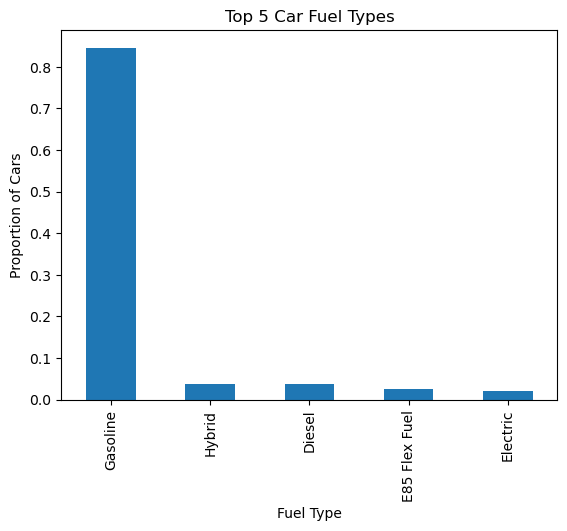

In [104]:
car_type_counts = df.fuel_type.value_counts()[:5]
print(car_type_counts/df.shape[0])
(car_type_counts/df.shape[0]).plot(kind="bar")
plt.title("Top 5 Car Fuel Types")
plt.ylabel('Proportion of Cars')
plt.xlabel('Fuel Type')

<h3> Exploratory Analysis Part 2: The dataset that only has electric vehicles</h3>

First, lets create a new Dataframe that only includes electric vehicles.

In [105]:
electric_cars = df.loc[df['fuel_type'] == 'Electric']

electric_cars.head()


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
8497,Audi,RS e-tron GT Base,2022,1502.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Suzuka Gray Metallic,Black / Express Red,0.0,1.0,1.0,Elliott Bay Auto Brokers,4.7,NaN,0.0,6000.0,132880.0
8498,Audi,RS e-tron GT Base,2022,11020.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Daytona Gray Pearl Effect,Arras Red,0.0,1.0,1.0,Audi South Atlanta,3.8,NaN,0.0,10000.0,119985.0
8499,Audi,RS e-tron GT Base,2022,6741.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Mythos Black Metallic,Black / Express Red,0.0,1.0,0.0,Audi Norwell,3.3,NaN,0.0,3020.0,116980.0
8500,Audi,RS e-tron GT Base,2022,7822.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Ascari Blue Metallic,Black,0.0,1.0,1.0,Audi Tysons Corner,4.9,NaN,0.0,905.0,118820.0
8502,Audi,RS e-tron GT Base,2022,2319.0,Electric,2-Speed Automatic,All-wheel Drive,Electric,NaN,Mythos Black Metallic,Black / Express Red,0.0,1.0,1.0,Alpha One Motors,NaN,NaN,0.0,NaN,137888.0


**1.** How many electric vehicles do we have in our new dataframe?

In [106]:
electric_cars.shape

(16192, 20)

**2.** How many unique values are in each column?

In [107]:
electric_cars.nunique(axis=0)

manufacturer              19
model                    346
year                      14
mileage                13878
engine                   160
transmission              36
drivetrain                10
fuel_type                  1
mpg                        0
exterior_color           582
interior_color           253
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_name             5629
seller_rating             41
driver_rating             19
driver_reviews_num        49
price_drop              2178
price                   7520
dtype: int64

**3.** What are some general statistics about the columns that only have numerical values?

In [108]:
electric_cars.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,16192.000000,16186.000000,15358.000000,15192.000000,15356.000000,12383.000000,14503.000000,16192.000000,10206.000000,16192.000000
mean,2019.609684,27372.064500,0.118505,0.684834,0.834592,4.144262,4.469875,19.707819,1528.438272,46109.309536
std,2.583342,24761.724235,0.323216,0.464597,0.371560,0.817439,0.382721,25.101138,1886.799860,27439.581177
min,2010.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,4100.000000
25%,2018.000000,8658.500000,0.000000,0.000000,1.000000,3.800000,4.200000,4.000000,500.000000,27998.000000
50%,2020.000000,20769.000000,0.000000,1.000000,1.000000,4.500000,4.500000,13.000000,1000.000000,40778.000000
75%,2022.000000,39358.250000,0.000000,1.000000,1.000000,4.700000,4.800000,25.250000,2000.000000,54328.500000
max,2023.000000,330022.000000,1.000000,1.000000,1.000000,5.000000,5.000000,193.000000,50000.000000,333333.000000


**4.** Which columns have no missing values?

In [109]:
#columns that do not have any missing values
electric_cars.loc[:,electric_cars.isna().sum() == 0].columns

Index(['manufacturer', 'model', 'year', 'fuel_type', 'driver_reviews_num',
       'price'],
      dtype='object')

**5.** Which columns have missing values, and what percent of the values are missing in the columns that do have missing values?

In [110]:
#columns that have missing values
electric_cars.loc[:,electric_cars.isna().mean() != 0].isna().mean()

mileage                0.000371
engine                 0.007164
transmission           0.002779
drivetrain             0.006917
mpg                    1.000000
exterior_color         0.016304
interior_color         0.084054
accidents_or_damage    0.051507
one_owner              0.061759
personal_use_only      0.051630
seller_name            0.031497
seller_rating          0.235240
driver_rating          0.104311
price_drop             0.369689
dtype: float64

**6.** Which manufacturer has the most and least used electric vehicles for sale?

In [111]:
e_car_type_counts = electric_cars.manufacturer.value_counts()

print(e_car_type_counts/electric_cars.shape[0])

Tesla            0.362648
Ford             0.110363
Nissan           0.109066
Chevrolet        0.071949
BMW              0.057868
Volkswagen       0.054163
Kia              0.052989
Porsche          0.041811
Audi             0.039279
Hyundai          0.033288
Mercedes-Benz    0.025383
Volvo            0.015625
Toyota           0.013402
Jaguar           0.003706
Cadillac         0.003273
GMC              0.001729
Subaru           0.001667
Mitsubishi       0.000926
Mazda            0.000865
Name: manufacturer, dtype: float64


Below is a nice visual called a treemap, that shows how well represented the manufacturers are in the used electric vehicle market

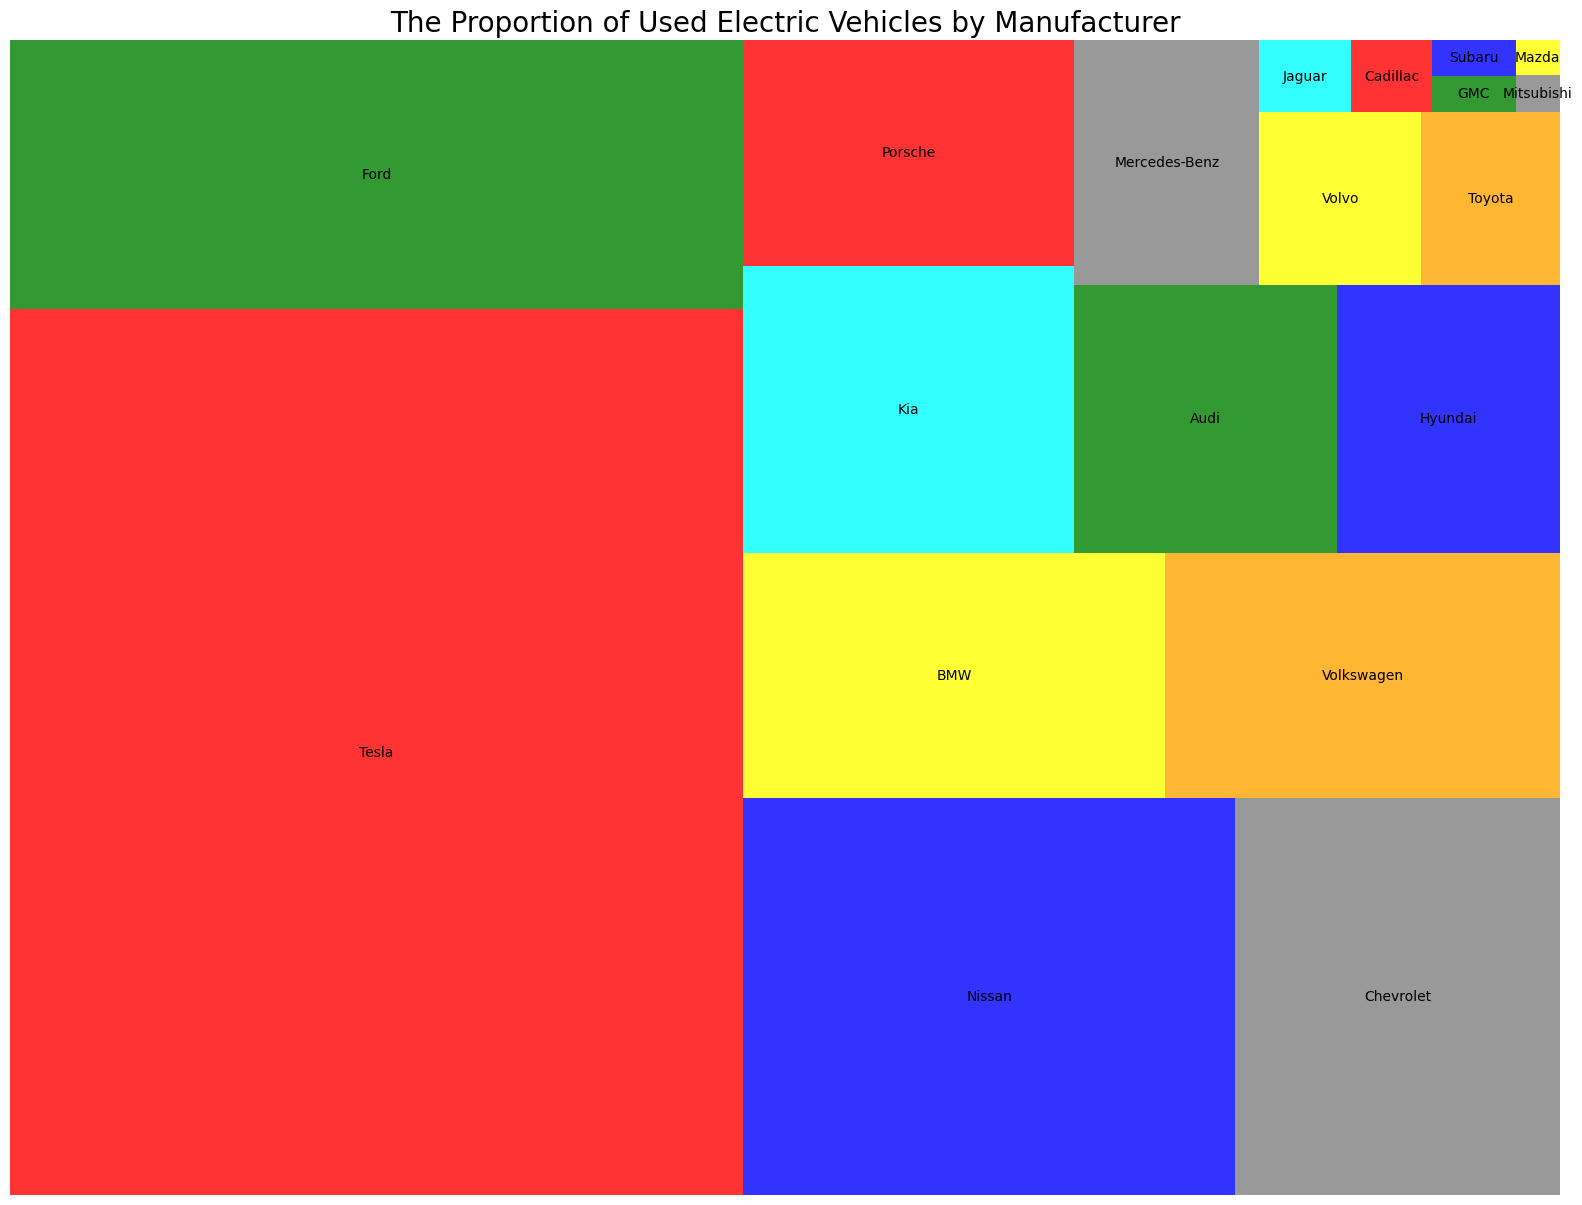

In [112]:
fig, ax = plt.subplots(1, figsize = (20,15))
squarify.plot(sizes = e_car_type_counts.values, label = e_car_type_counts.index, alpha = 0.8, color=['red','green','blue','grey','yellow','orange','cyan'])
plt.axis('off')
plt.title("The Proportion of Used Electric Vehicles by Manufacturer", fontsize = 20)
plt.show()

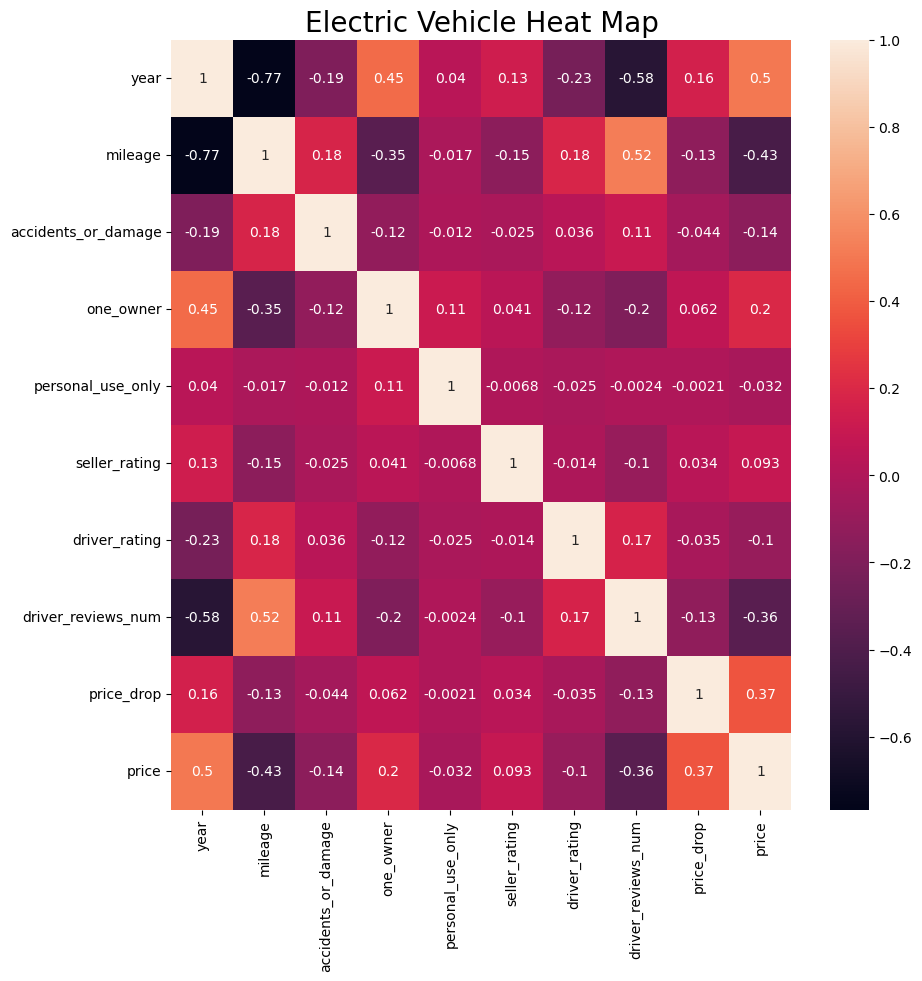

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(electric_cars.corr(method='pearson',numeric_only=True), annot=True, ax=ax)
plt.title('Electric Vehicle Heat Map', fontsize=20)
plt.show()

#sns.scatterplot(x="year", y="odometer", data=electric_cars, hue="manufacturer", ax=ax)

<h3> Clean the Data </h3>

Lets start with the easy ones. From our exploratory analysis we can remove mpg and fuel type since both of those columns only have one value.

In [114]:
electric_cars = electric_cars.drop(['mpg','fuel_type'], axis=1)
electric_cars.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
8497,Audi,RS e-tron GT Base,2022,1502.0,Electric,2-Speed Automatic,All-wheel Drive,Suzuka Gray Metallic,Black / Express Red,0.0,1.0,1.0,Elliott Bay Auto Brokers,4.7,NaN,0.0,6000.0,132880.0
8498,Audi,RS e-tron GT Base,2022,11020.0,Electric,2-Speed Automatic,All-wheel Drive,Daytona Gray Pearl Effect,Arras Red,0.0,1.0,1.0,Audi South Atlanta,3.8,NaN,0.0,10000.0,119985.0
8499,Audi,RS e-tron GT Base,2022,6741.0,Electric,2-Speed Automatic,All-wheel Drive,Mythos Black Metallic,Black / Express Red,0.0,1.0,0.0,Audi Norwell,3.3,NaN,0.0,3020.0,116980.0
8500,Audi,RS e-tron GT Base,2022,7822.0,Electric,2-Speed Automatic,All-wheel Drive,Ascari Blue Metallic,Black,0.0,1.0,1.0,Audi Tysons Corner,4.9,NaN,0.0,905.0,118820.0
8502,Audi,RS e-tron GT Base,2022,2319.0,Electric,2-Speed Automatic,All-wheel Drive,Mythos Black Metallic,Black / Express Red,0.0,1.0,1.0,Alpha One Motors,NaN,NaN,0.0,NaN,137888.0


To fill in the missing values for the mileage, we could determine the median mile value for each year.

Text(0.5, 0, 'Year')

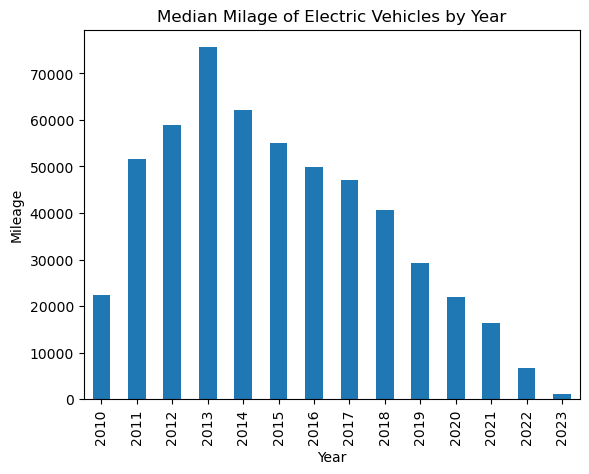

In [115]:
mileage_by_year = electric_cars.groupby('year').median(numeric_only = True)['mileage']
mileage_by_year.plot(kind='bar')
plt.title("Median Milage of Electric Vehicles by Year")
plt.ylabel('Mileage')
plt.xlabel('Year')

On a side note, its interesting how the median value of the mileage goes down at year 2012. The mileage of 2012 is much less than 2013 and less than 2014. This could be due to technological advancements or due to the fact that more consumers where driving electric vehicles more often. 

Now lets fill in the median mile values we obtained anywhere there is a mileage missing in our dataset.

In [116]:
#Using the median mileage of each year to fill in the missing values 
electric_cars['mileage'] = electric_cars.apply(lambda row: mileage_by_year.loc[row['year']] if pd.isna(row['mileage']) else row['mileage'], axis=1)
